In [ ]:
import shutil
import os

# Source directory (the one you want to copy)
src_dir = '/kaggle/input/fastsam-file'

# Destination directory (where you want to copy the files to)
dest_dir = '/kaggle/working/'

# Check if the destination directory exists, if not, create it
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

# Copy the directory tree from source to destination
try:
    shutil.copytree(src_dir, dest_dir, dirs_exist_ok=True)
    print(f"Contents of {src_dir} have been successfully copied to {dest_dir}")
except Exception as e:
    print(f"An error occurred while copying: {e}")


In [3]:
!conda activate FastSAM

usage: conda [-h] [--no-plugins] [-V] COMMAND ...
conda: error: argument COMMAND: invalid choice: 'activate' (choose from 'clean', 'compare', 'config', 'create', 'info', 'init', 'install', 'list', 'notices', 'package', 'remove', 'uninstall', 'rename', 'run', 'search', 'update', 'upgrade', 'doctor', 'env')


In [4]:
%cd FastSAM
!pip install -r requirements.txt

/kaggle/working/FastSAM
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 43.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.7/611.7 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 

In [5]:
!ls

Inference.py	README.md      cog.yaml  images      requirements.txt  utils
LICENSE		app_gradio.py  examples  output      segpredict.py     weights
MORE_USAGES.md	assets	       fastsam	 predict.py  setup.py


In [6]:
!pip install git+https://github.com/ultralytics/CLIP.git

  Cloning https://github.com/ultralytics/CLIP.git to /tmp/pip-req-build-exgm_zjd
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/CLIP.git /tmp/pip-req-build-exgm_zjd
  Resolved https://github.com/ultralytics/CLIP.git to commit e17416a36b45d040758327936a1ea150c13fe3d1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 766.4 kB/s eta 0:00:00a 0:00:01
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369504 sha256=18d829429c9438693b01a9da15b5383e99256fc36047813d6b96e9c974ba84a7
  Stored in directory: /tmp/pip-ephem-wheel-cache-6qwmrtej/wheels/2e/25/92/e26f2a227599930e19a8188891e9600b6dd36721a0f8d6ef40
Successfully built clip


### Let's see prediction using FastSAM-S model S(Small Large Model)

In [8]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE=device

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Set the Folder Directory

In [10]:
!pwd

/kaggle/working/FastSAM


### Let's see prediction using FastSAM-s model. s(Small model)


In [11]:
from fastsam import FastSAM, FastSAMPrompt


def fastsam_s(text,input_path, output_path):
    """
    Performs semantic segmentation on an image using FastSAM-s model.

    Args:
        input_path (str): Path to the input image.
        output_path (str): Path to save the output image.
    """

    model = FastSAM("/kaggle/input/fastsam-file/FastSAM/weights/FastSAM-s.pt")
    image_path = input_path
    device = DEVICE

    print(device)

    results = model(
        image_path,
        device=device,
        retina_masks=True,
        imgsz=512,
        conf=0.4,
        iou=0.9,
    )

    prompt_process = FastSAMPrompt(image_path,results, device=device)

    # Choose the desired prompt type (commented out options are not used)
    # ann = prompt_process.everything_prompt()  # Uncomment for everything prompt

    # ann = prompt_process.box_prompt(bboxes=[[200, 200, 300, 300]])  # Uncomment for bounding box prompt

    ann = prompt_process.text_prompt(text=text)  # Use text prompt

    # ann = prompt_process.point_prompt(points=[[620, 360]], pointlabel=[1])  # Uncomment for point prompt

    prompt_process.plot(annotations=ann, output_path=output_path)


In [14]:
#Lets predict the segmentation
text='Area of boat'
input_path='./images/frame_0.jpg'
output_path='./output/output0.jpg'
fastsam_s(text,input_path, output_path)

cuda


image 1/1 /kaggle/working/FastSAM/images/frame_0.jpg: 288x512 26 objects, 11.4ms
Speed: 1.2ms preprocess, 11.4ms inference, 6.1ms postprocess per image at shape (1, 3, 512, 512)


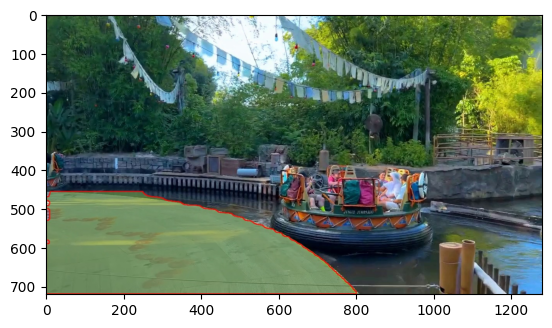

In [16]:
#text="All area of the boat"
path="/kaggle/working/FastSAM/output/output0.jpg"
img=mpimg.imread(path)
plt.imshow(img)


### Pyhon code FastSAM-x

In [17]:
from fastsam import FastSAM, FastSAMPrompt


def fastsam_x(text,input_path, output_path):
    """
    Performs semantic segmentation on an image using FastSAM-s model.

    Args:
        input_path (str): Path to the input image.
        output_path (str): Path to save the output image.
    """

    model = FastSAM("./weights/FastSAM-x.pt")
    image_path = input_path
    device = DEVICE

    print(device)

    results = model(
        image_path,
        device=device,
        retina_masks=True,
        imgsz=512,
        conf=0.4,
        iou=0.9,
    )

    prompt_process = FastSAMPrompt(image_path,results, device=device)

    # Choose the desired prompt type (commented out options are not used)
    # ann = prompt_process.everything_prompt()  # Uncomment for everything prompt

    # ann = prompt_process.box_prompt(bboxes=[[200, 200, 300, 300]])  # Uncomment for bounding box prompt

    ann = prompt_process.text_prompt(text=text)  # Use text prompt

    # ann = prompt_process.point_prompt(points=[[620, 360]], pointlabel=[1])  # Uncomment for point prompt

    prompt_process.plot(annotations=ann, output_path=output_path)


In [18]:
#Lets predict the segmentation
text='All area of boat'
input_path='./images/frame_0.jpg'
output_path='./output/output1.jpg'
fastsam_x(text,input_path, output_path)

cuda



image 1/1 /kaggle/working/FastSAM/images/frame_0.jpg: 288x512 29 objects, 106.8ms
Speed: 1.4ms preprocess, 106.8ms inference, 6.6ms postprocess per image at shape (1, 3, 512, 512)


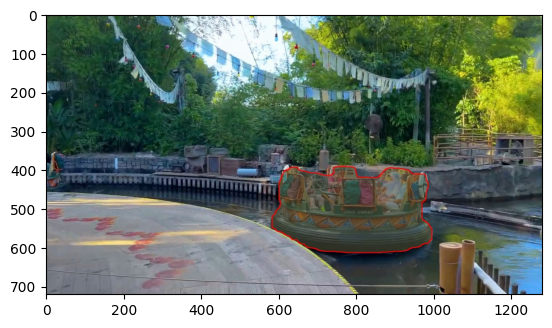

In [21]:
#text="All area of the boat"
path="/kaggle/working/FastSAM/output/output1.jpg"
img=mpimg.imread(path)
plt.imshow(img)

In [22]:
#Lets predict the segmentation
text='All area of boat'
input_path='./images/frame_5.jpg'
output_path='./output/output3.jpg'
fastsam_x(text,input_path, output_path)

cuda



image 1/1 /kaggle/working/FastSAM/images/frame_5.jpg: 288x512 29 objects, 54.3ms
Speed: 1.5ms preprocess, 54.3ms inference, 6.9ms postprocess per image at shape (1, 3, 512, 512)


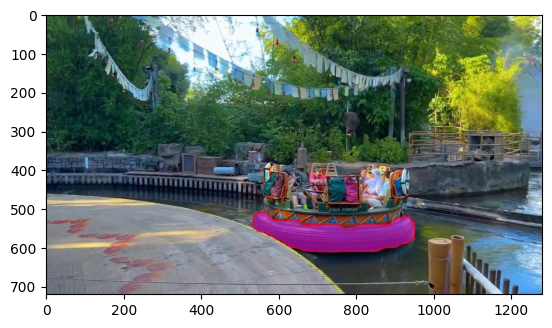

In [23]:
#text="All area of the boat"
path="/kaggle/working/FastSAM/output/output3.jpg"
img=mpimg.imread(path)
plt.imshow(img)

In [26]:
#Lets predict the segmentation
text='boat'
input_path='./images/frame_1383.jpg'
output_path='./output/output4.jpg'
fastsam_x(text,input_path, output_path)

cuda



image 1/1 /kaggle/working/FastSAM/images/frame_1383.jpg: 288x512 44 objects, 54.3ms
Speed: 1.3ms preprocess, 54.3ms inference, 8.7ms postprocess per image at shape (1, 3, 512, 512)


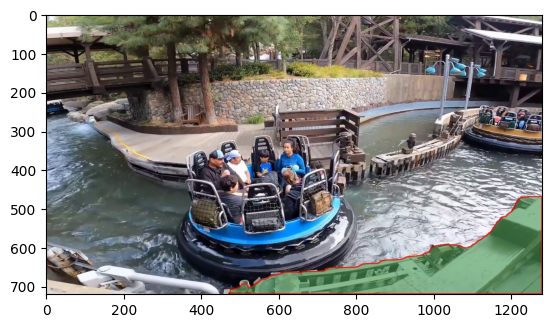

In [27]:
#text="All area of the boat"
path="/kaggle/working/FastSAM/output/output4.jpg"
img=mpimg.imread(path)
plt.imshow(img)

## Prediction on video

## Lets Harcode it for predicting segmentation in video

In [75]:
from fastsam import FastSAM, FastSAMPrompt


def fastsam_x(text,input_path):
    """
    Performs semantic segmentation on an image using FastSAM-s model.

    Args:
        input_path (str): Path to the input image.
        output_path (str): Path to save the output image.
    """

    model = FastSAM("./weights/FastSAM-x.pt")
    image_path = input_path
    device = DEVICE

    print(device)

    results = model(
        image_path,
        device=device,
        retina_masks=True,
        imgsz=(1024, 512),
        conf=0.4,
        iou=0.9,
    )

    prompt_process = FastSAMPrompt(image_path,results, device=device)

    # Choose the desired prompt type (commented out options are not used)
    # ann = prompt_process.everything_prompt()  # Uncomment for everything prompt

    # ann = prompt_process.box_prompt(bboxes=[[200, 200, 300, 300]])  # Uncomment for bounding box prompt

    ann = prompt_process.text_prompt(text=text)  # Use text prompt

    # ann = prompt_process.point_prompt(points=[[620, 360]], pointlabel=[1])  # Uncomment for point prompt

    return ann


In [73]:
#Lets predict the segmentation
text='All area of boat'
input_path='./images/frame_0.jpg'
x=fastsam_x(text,input_path)

cuda



image 1/1 /kaggle/working/FastSAM/images/frame_0.jpg: 288x512 29 objects, 46.9ms
Speed: 1.4ms preprocess, 46.9ms inference, 5.8ms postprocess per image at shape (1, 3, 1024, 512)


In [30]:
x


array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


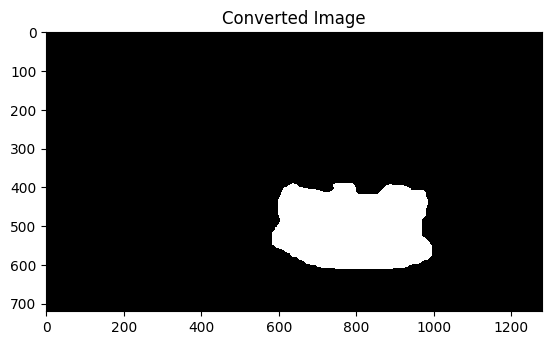

In [31]:
#Extract the binary mask out of it
x_int = x.astype(int)
print(x_int)
plt.imshow(x_int[0], cmap='gray', interpolation='nearest')
plt.title('Converted Image')
plt.show()

In [50]:
print(x_int[0].shape)
mask=x_int
mask.shape

(720, 1280)


(1, 720, 1280)

In [34]:
path="/kaggle/working/FastSAM/images/frame_0.jpg"
img=mpimg.imread(path)
img.shape

(720, 1280, 3)

In [ ]:
img.shape,mask.shape

((720, 1280, 3), (1, 720, 1280))

## Combine Every Thing 

In [106]:
from fastsam import FastSAM, FastSAMPrompt


def fastsam_x(text,input_path):
    """
    Performs semantic segmentation on an image using FastSAM-s model.

    Args:
        input_path (str): Path to the input image.
        output_path (str): Path to save the output image.
    """

    model = FastSAM("./weights/FastSAM-x.pt")
    image_path = input_path
    device = DEVICE

    print(device)

    results = model(
        image_path,
        device=device,
        retina_masks=True,
        imgsz=(512, 512),
        conf=0.4,
        iou=0.9,
    )

    prompt_process = FastSAMPrompt(image_path,results, device=device)

    # Choose the desired prompt type (commented out options are not used)
    # ann = prompt_process.everything_prompt()  # Uncomment for everything prompt

    # ann = prompt_process.box_prompt(bboxes=[[200, 200, 300, 300]])  # Uncomment for bounding box prompt

    ann = prompt_process.text_prompt(text=text)  # Use text prompt

    # ann = prompt_process.point_prompt(points=[[620, 360]], pointlabel=[1])  # Uncomment for point prompt

    return ann


## Overlay the mask on Original Image

In [110]:
import time
def overlay_mask_on_image(frame, binary_mask):
    start=time.time()
    """
    Overlay the polygon from the mask on the given frame.
    
    Parameters:
    frame (numpy.ndarray): The original image.
    mask (numpy.ndarray): The mask with shape (1, height, width).
    
    Returns:
    numpy.ndarray: The image with the overlayed mask.
    """
    mask = binary_mask.reshape(512,512)

    # Convert the mask to binary (0 and 255)
    mask = (mask > 0).astype(np.uint8) * 255
    print(mask.shape,frame.shape)
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank image to draw the contours
    contour_img = np.zeros_like(frame)

    # Draw the contours on the blank image
    cv2.drawContours(contour_img, contours, -1, (255, 0,0), 6)  # Draw contours in green color

    # Overlay the contours on the original image
    overlayed_img = cv2.addWeighted(frame, 0.9, contour_img, 0.9, 0)
    end=time.time()
    print("Time taken by Overlay code: ",end-start)
    return overlayed_img
    
    #return overlayed_img

In [62]:
# #Lets see how it look like
# img=overlay_mask_on_image(img,mask)
# plt.imshow(img)

In [115]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
cap=cv2.VideoCapture('/kaggle/input/combined-video-boat/Combined_Video_for_Image_segmentation.mp4')
out = cv2.VideoWriter('/kaggle/working/video6.avi', fourcc, 25.0, (512, 512))

## Code Logic for predicting segmentation on video

In [116]:
count=0
text='Boat'

while count<1000:
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.resize(frame, (512,512))
    #print(frame.shape)
    # Process only every fifth frame
    #if count % 2 == 0:
    # Predict the mask
    mask = fastsam_x(text, frame)  # Call the actual model
    mask = mask.astype(int)  # Convert bool mask into int
    overlayed_frame = overlay_mask_on_image(frame, mask)  # Call the overlay function
    cv2.putText(overlayed_frame, text, (50, 55), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0), 1)
    out.write(overlayed_frame)
    
    count += 1

cap.release()
out.release()

cuda



0: 512x512 24 objects, 70.1ms
Speed: 1.6ms preprocess, 70.1ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015473365783691406
cuda



0: 512x512 29 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013697147369384766
cuda



0: 512x512 27 objects, 67.9ms
Speed: 1.2ms preprocess, 67.9ms inference, 5.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014002323150634766
cuda



0: 512x512 30 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015783309936523438
cuda



0: 512x512 27 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014657974243164062
cuda



0: 512x512 32 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013871192932128906
cuda



0: 512x512 31 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013270378112792969
cuda



0: 512x512 31 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013608932495117188
cuda



0: 512x512 29 objects, 68.7ms
Speed: 1.3ms preprocess, 68.7ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014524459838867188
cuda



0: 512x512 33 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013256072998046875
cuda



0: 512x512 30 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014102458953857422
cuda



0: 512x512 33 objects, 70.7ms
Speed: 1.5ms preprocess, 70.7ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014748573303222656
cuda



0: 512x512 30 objects, 67.9ms
Speed: 1.3ms preprocess, 67.9ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014297962188720703
cuda



0: 512x512 29 objects, 62.4ms
Speed: 1.2ms preprocess, 62.4ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014410018920898438
cuda



0: 512x512 31 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001424551010131836
cuda



0: 512x512 32 objects, 69.0ms
Speed: 1.3ms preprocess, 69.0ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015773773193359375
cuda



0: 512x512 32 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001378774642944336
cuda



0: 512x512 30 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013849735260009766
cuda



0: 512x512 30 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014586448669433594
cuda



0: 512x512 31 objects, 63.4ms
Speed: 1.4ms preprocess, 63.4ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015060901641845703
cuda



0: 512x512 35 objects, 63.2ms
Speed: 1.2ms preprocess, 63.2ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015947818756103516
cuda



0: 512x512 33 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013842582702636719
cuda



0: 512x512 33 objects, 62.4ms
Speed: 3.2ms preprocess, 62.4ms inference, 5.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014805793762207031
cuda



0: 512x512 31 objects, 61.7ms
Speed: 1.3ms preprocess, 61.7ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015301704406738281
cuda



0: 512x512 33 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001459360122680664
cuda



0: 512x512 36 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.00147247314453125
cuda



0: 512x512 35 objects, 64.7ms
Speed: 1.2ms preprocess, 64.7ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014269351959228516
cuda



0: 512x512 34 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015707015991210938
cuda



0: 512x512 35 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0017147064208984375
cuda



0: 512x512 32 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001628875732421875
cuda



0: 512x512 33 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0018138885498046875
cuda



0: 512x512 31 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014667510986328125
cuda



0: 512x512 37 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0017817020416259766
cuda



0: 512x512 38 objects, 70.7ms
Speed: 1.6ms preprocess, 70.7ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015697479248046875
cuda



0: 512x512 36 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001430511474609375
cuda



0: 512x512 36 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016214847564697266
cuda



0: 512x512 31 objects, 62.4ms
Speed: 1.2ms preprocess, 62.4ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015234947204589844
cuda



0: 512x512 33 objects, 66.2ms
Speed: 1.2ms preprocess, 66.2ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014755725860595703
cuda



0: 512x512 32 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.00156402587890625
cuda



0: 512x512 37 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014286041259765625
cuda



0: 512x512 31 objects, 67.1ms
Speed: 1.3ms preprocess, 67.1ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014491081237792969
cuda



0: 512x512 34 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014576911926269531
cuda



0: 512x512 31 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001497030258178711
cuda



0: 512x512 33 objects, 68.8ms
Speed: 1.2ms preprocess, 68.8ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015370845794677734
cuda



0: 512x512 34 objects, 70.8ms
Speed: 1.9ms preprocess, 70.8ms inference, 5.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013360977172851562
cuda



0: 512x512 32 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001458883285522461
cuda



0: 512x512 34 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014607906341552734
cuda



0: 512x512 31 objects, 61.9ms
Speed: 1.2ms preprocess, 61.9ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015218257904052734
cuda



0: 512x512 34 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001413583755493164
cuda



0: 512x512 34 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014834403991699219
cuda



0: 512x512 37 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013718605041503906
cuda



0: 512x512 33 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013697147369384766
cuda



0: 512x512 34 objects, 63.4ms
Speed: 1.2ms preprocess, 63.4ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014066696166992188
cuda



0: 512x512 35 objects, 65.2ms
Speed: 1.2ms preprocess, 65.2ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013298988342285156
cuda



0: 512x512 30 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013575553894042969
cuda



0: 512x512 32 objects, 70.7ms
Speed: 1.5ms preprocess, 70.7ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014011859893798828
cuda



0: 512x512 33 objects, 70.3ms
Speed: 1.2ms preprocess, 70.3ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001451253890991211
cuda



0: 512x512 30 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014414787292480469
cuda



0: 512x512 25 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013821125030517578
cuda



0: 512x512 28 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014448165893554688
cuda



0: 512x512 30 objects, 61.9ms
Speed: 1.2ms preprocess, 61.9ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015153884887695312
cuda



0: 512x512 32 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001581430435180664
cuda



0: 512x512 31 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016512870788574219
cuda



0: 512x512 31 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013077259063720703
cuda



0: 512x512 38 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001413106918334961
cuda



0: 512x512 33 objects, 62.9ms
Speed: 1.2ms preprocess, 62.9ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013988018035888672
cuda



0: 512x512 29 objects, 70.7ms
Speed: 3.1ms preprocess, 70.7ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016617774963378906
cuda



0: 512x512 32 objects, 66.7ms
Speed: 1.3ms preprocess, 66.7ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015494823455810547
cuda



0: 512x512 31 objects, 61.9ms
Speed: 1.2ms preprocess, 61.9ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012917518615722656
cuda



0: 512x512 32 objects, 70.0ms
Speed: 1.2ms preprocess, 70.0ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011553764343261719
cuda



0: 512x512 34 objects, 68.1ms
Speed: 1.3ms preprocess, 68.1ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.00135040283203125
cuda



0: 512x512 31 objects, 66.4ms
Speed: 1.2ms preprocess, 66.4ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013499259948730469
cuda



0: 512x512 27 objects, 64.6ms
Speed: 1.2ms preprocess, 64.6ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013670921325683594
cuda



0: 512x512 34 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014238357543945312
cuda



0: 512x512 28 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001371145248413086
cuda



0: 512x512 30 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001318216323852539
cuda



0: 512x512 26 objects, 62.3ms
Speed: 1.2ms preprocess, 62.3ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014348030090332031
cuda



0: 512x512 24 objects, 70.7ms
Speed: 1.5ms preprocess, 70.7ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015721321105957031
cuda



0: 512x512 28 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001619100570678711
cuda



0: 512x512 28 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001520395278930664
cuda



0: 512x512 27 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013127326965332031
cuda



0: 512x512 25 objects, 69.1ms
Speed: 1.2ms preprocess, 69.1ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014257431030273438
cuda



0: 512x512 24 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012619495391845703
cuda



0: 512x512 24 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015044212341308594
cuda



0: 512x512 26 objects, 62.2ms
Speed: 1.2ms preprocess, 62.2ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014989376068115234
cuda



0: 512x512 26 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014224052429199219
cuda



0: 512x512 26 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001275777816772461
cuda



0: 512x512 28 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001226663589477539
cuda



0: 512x512 27 objects, 70.8ms
Speed: 1.6ms preprocess, 70.8ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013289451599121094
cuda



0: 512x512 27 objects, 66.7ms
Speed: 1.4ms preprocess, 66.7ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012085437774658203
cuda



0: 512x512 28 objects, 67.0ms
Speed: 1.3ms preprocess, 67.0ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015175342559814453
cuda



0: 512x512 31 objects, 62.8ms
Speed: 1.2ms preprocess, 62.8ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012030601501464844
cuda



0: 512x512 29 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013813972473144531
cuda



0: 512x512 29 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001184701919555664
cuda



0: 512x512 28 objects, 68.3ms
Speed: 1.2ms preprocess, 68.3ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012845993041992188
cuda



0: 512x512 27 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012993812561035156
cuda



0: 512x512 32 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001374959945678711
cuda



0: 512x512 29 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014157295227050781
cuda



0: 512x512 33 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013628005981445312
cuda



0: 512x512 27 objects, 70.7ms
Speed: 1.5ms preprocess, 70.7ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012912750244140625
cuda



0: 512x512 29 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014789104461669922
cuda



0: 512x512 27 objects, 68.7ms
Speed: 1.3ms preprocess, 68.7ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014111995697021484
cuda



0: 512x512 29 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0019974708557128906
cuda



0: 512x512 34 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012331008911132812
cuda



0: 512x512 32 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012667179107666016
cuda



0: 512x512 36 objects, 61.9ms
Speed: 1.3ms preprocess, 61.9ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001271963119506836
cuda



0: 512x512 30 objects, 70.6ms
Speed: 1.7ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012896060943603516
cuda



0: 512x512 24 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012102127075195312
cuda



0: 512x512 34 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012829303741455078
cuda



0: 512x512 30 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013768672943115234
cuda



0: 512x512 29 objects, 70.7ms
Speed: 1.3ms preprocess, 70.7ms inference, 5.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001245737075805664
cuda



0: 512x512 31 objects, 61.7ms
Speed: 1.2ms preprocess, 61.7ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013527870178222656
cuda



0: 512x512 30 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012731552124023438
cuda



0: 512x512 33 objects, 69.1ms
Speed: 1.2ms preprocess, 69.1ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011723041534423828
cuda



0: 512x512 29 objects, 64.2ms
Speed: 1.2ms preprocess, 64.2ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014612674713134766
cuda



0: 512x512 33 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014317035675048828
cuda



0: 512x512 31 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014886856079101562
cuda



0: 512x512 31 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013132095336914062
cuda



0: 512x512 32 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012691020965576172
cuda



0: 512x512 29 objects, 61.9ms
Speed: 1.2ms preprocess, 61.9ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013928413391113281
cuda



0: 512x512 32 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013203620910644531
cuda



0: 512x512 35 objects, 70.7ms
Speed: 1.3ms preprocess, 70.7ms inference, 5.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012874603271484375
cuda



0: 512x512 36 objects, 62.0ms
Speed: 1.2ms preprocess, 62.0ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014164447784423828
cuda



0: 512x512 34 objects, 61.7ms
Speed: 1.2ms preprocess, 61.7ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001361846923828125
cuda



0: 512x512 35 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014789104461669922
cuda



0: 512x512 31 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012979507446289062
cuda



0: 512x512 30 objects, 62.1ms
Speed: 1.2ms preprocess, 62.1ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015137195587158203
cuda



0: 512x512 31 objects, 63.2ms
Speed: 1.2ms preprocess, 63.2ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014972686767578125
cuda



0: 512x512 27 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013263225555419922
cuda



0: 512x512 28 objects, 67.9ms
Speed: 1.3ms preprocess, 67.9ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012440681457519531
cuda



0: 512x512 30 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014865398406982422
cuda



0: 512x512 31 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013415813446044922
cuda



0: 512x512 30 objects, 63.8ms
Speed: 1.7ms preprocess, 63.8ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001268148422241211
cuda



0: 512x512 30 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012693405151367188
cuda



0: 512x512 34 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001447439193725586
cuda



0: 512x512 30 objects, 70.5ms
Speed: 1.4ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014231204986572266
cuda



0: 512x512 36 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014262199401855469
cuda



0: 512x512 29 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 6.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015044212341308594
cuda



0: 512x512 27 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013973712921142578
cuda



0: 512x512 29 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013971328735351562
cuda



0: 512x512 27 objects, 63.4ms
Speed: 1.3ms preprocess, 63.4ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0018146038055419922
cuda



0: 512x512 28 objects, 70.6ms
Speed: 1.4ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013670921325683594
cuda



0: 512x512 33 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001444101333618164
cuda



0: 512x512 31 objects, 70.7ms
Speed: 1.6ms preprocess, 70.7ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012977123260498047
cuda



0: 512x512 29 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012269020080566406
cuda



0: 512x512 31 objects, 62.2ms
Speed: 1.3ms preprocess, 62.2ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012433528900146484
cuda



0: 512x512 28 objects, 65.7ms
Speed: 1.2ms preprocess, 65.7ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001413583755493164
cuda



0: 512x512 34 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011920928955078125
cuda



0: 512x512 27 objects, 69.2ms
Speed: 1.3ms preprocess, 69.2ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014202594757080078
cuda



0: 512x512 26 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001264810562133789
cuda



0: 512x512 29 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011982917785644531
cuda



0: 512x512 30 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012710094451904297
cuda



0: 512x512 29 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013251304626464844
cuda



0: 512x512 32 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001238107681274414
cuda



0: 512x512 27 objects, 70.7ms
Speed: 1.5ms preprocess, 70.7ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011997222900390625
cuda



0: 512x512 33 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012845993041992188
cuda



0: 512x512 29 objects, 64.4ms
Speed: 1.2ms preprocess, 64.4ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014188289642333984
cuda



0: 512x512 30 objects, 62.8ms
Speed: 1.2ms preprocess, 62.8ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001489400863647461
cuda



0: 512x512 30 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013458728790283203
cuda



0: 512x512 36 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014333724975585938
cuda



0: 512x512 31 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011391639709472656
cuda



0: 512x512 31 objects, 69.7ms
Speed: 1.2ms preprocess, 69.7ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013577938079833984
cuda



0: 512x512 27 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012357234954833984
cuda



0: 512x512 25 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001177072525024414
cuda



0: 512x512 31 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011758804321289062
cuda



0: 512x512 33 objects, 70.7ms
Speed: 1.5ms preprocess, 70.7ms inference, 5.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001176595687866211
cuda



0: 512x512 24 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013854503631591797
cuda



0: 512x512 28 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013568401336669922
cuda



0: 512x512 32 objects, 62.9ms
Speed: 1.2ms preprocess, 62.9ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001291513442993164
cuda



0: 512x512 21 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014872550964355469
cuda



0: 512x512 29 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013709068298339844
cuda



0: 512x512 27 objects, 69.0ms
Speed: 1.2ms preprocess, 69.0ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001249074935913086
cuda



0: 512x512 32 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014119148254394531
cuda



0: 512x512 28 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001585245132446289
cuda



0: 512x512 24 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001249074935913086
cuda



0: 512x512 23 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012137889862060547
cuda



0: 512x512 24 objects, 62.6ms
Speed: 1.6ms preprocess, 62.6ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001180887222290039
cuda



0: 512x512 22 objects, 65.6ms
Speed: 1.3ms preprocess, 65.6ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013489723205566406
cuda



0: 512x512 16 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013892650604248047
cuda



0: 512x512 20 objects, 63.6ms
Speed: 1.2ms preprocess, 63.6ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013883113861083984
cuda



0: 512x512 21 objects, 65.0ms
Speed: 1.2ms preprocess, 65.0ms inference, 5.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014400482177734375
cuda



0: 512x512 24 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011949539184570312
cuda



0: 512x512 22 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014314651489257812
cuda



0: 512x512 28 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013086795806884766
cuda



0: 512x512 25 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013675689697265625
cuda



0: 512x512 29 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014133453369140625
cuda



0: 512x512 24 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001224517822265625
cuda



0: 512x512 27 objects, 70.8ms
Speed: 1.6ms preprocess, 70.8ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014448165893554688
cuda



0: 512x512 30 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013475418090820312
cuda



0: 512x512 29 objects, 66.3ms
Speed: 1.2ms preprocess, 66.3ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013775825500488281
cuda



0: 512x512 35 objects, 69.5ms
Speed: 1.2ms preprocess, 69.5ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013430118560791016
cuda



0: 512x512 37 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012240409851074219
cuda



0: 512x512 33 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001341104507446289
cuda



0: 512x512 38 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013785362243652344
cuda



0: 512x512 35 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013799667358398438
cuda



0: 512x512 37 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013585090637207031
cuda



0: 512x512 34 objects, 69.1ms
Speed: 1.2ms preprocess, 69.1ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011997222900390625
cuda



0: 512x512 33 objects, 69.0ms
Speed: 1.2ms preprocess, 69.0ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013239383697509766
cuda



0: 512x512 33 objects, 70.7ms
Speed: 1.6ms preprocess, 70.7ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012791156768798828
cuda



0: 512x512 34 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001538991928100586
cuda



0: 512x512 36 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001394510269165039
cuda



0: 512x512 37 objects, 64.3ms
Speed: 1.3ms preprocess, 64.3ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014138221740722656
cuda



0: 512x512 42 objects, 68.8ms
Speed: 1.2ms preprocess, 68.8ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013470649719238281
cuda



0: 512x512 31 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014214515686035156
cuda



0: 512x512 32 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014870166778564453
cuda



0: 512x512 37 objects, 64.4ms
Speed: 1.2ms preprocess, 64.4ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014019012451171875
cuda



0: 512x512 36 objects, 62.0ms
Speed: 1.3ms preprocess, 62.0ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015518665313720703
cuda



0: 512x512 33 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013272762298583984
cuda



0: 512x512 33 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001313924789428711
cuda



0: 512x512 28 objects, 70.5ms
Speed: 1.5ms preprocess, 70.5ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014510154724121094
cuda



0: 512x512 36 objects, 69.2ms
Speed: 1.3ms preprocess, 69.2ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014297962188720703
cuda



0: 512x512 31 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001474142074584961
cuda



0: 512x512 29 objects, 66.2ms
Speed: 1.2ms preprocess, 66.2ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001310586929321289
cuda



0: 512x512 35 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013873577117919922
cuda



0: 512x512 31 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012540817260742188
cuda



0: 512x512 34 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014004707336425781
cuda



0: 512x512 28 objects, 70.6ms
Speed: 1.4ms preprocess, 70.6ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001146554946899414
cuda



0: 512x512 33 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011744499206542969
cuda



0: 512x512 31 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012307167053222656
cuda



0: 512x512 33 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012302398681640625
cuda



0: 512x512 32 objects, 70.7ms
Speed: 1.7ms preprocess, 70.7ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015096664428710938
cuda



0: 512x512 41 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015635490417480469
cuda



0: 512x512 37 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014452934265136719
cuda



0: 512x512 33 objects, 66.1ms
Speed: 1.2ms preprocess, 66.1ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001481771469116211
cuda



0: 512x512 35 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001283884048461914
cuda



0: 512x512 30 objects, 69.2ms
Speed: 1.2ms preprocess, 69.2ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001445770263671875
cuda



0: 512x512 32 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014300346374511719
cuda



0: 512x512 33 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014700889587402344
cuda



0: 512x512 29 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014576911926269531
cuda



0: 512x512 31 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001360177993774414
cuda



0: 512x512 35 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001394033432006836
cuda



0: 512x512 28 objects, 62.7ms
Speed: 1.5ms preprocess, 62.7ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013191699981689453
cuda



0: 512x512 29 objects, 70.6ms
Speed: 1.7ms preprocess, 70.6ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001310110092163086
cuda



0: 512x512 25 objects, 62.8ms
Speed: 1.2ms preprocess, 62.8ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001211404800415039
cuda



0: 512x512 25 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013437271118164062
cuda



0: 512x512 27 objects, 62.5ms
Speed: 1.2ms preprocess, 62.5ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012059211730957031
cuda



0: 512x512 26 objects, 65.3ms
Speed: 1.3ms preprocess, 65.3ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014889240264892578
cuda



0: 512x512 25 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013930797576904297
cuda



0: 512x512 28 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013828277587890625
cuda



0: 512x512 31 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014328956604003906
cuda



0: 512x512 32 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001195669174194336
cuda



0: 512x512 29 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011668205261230469
cuda



0: 512x512 34 objects, 69.3ms
Speed: 1.6ms preprocess, 69.3ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012676715850830078
cuda



0: 512x512 28 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014340877532958984
cuda



0: 512x512 31 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014460086822509766
cuda



0: 512x512 33 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012278556823730469
cuda



0: 512x512 29 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012977123260498047
cuda



0: 512x512 27 objects, 62.8ms
Speed: 1.2ms preprocess, 62.8ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001268148422241211
cuda



0: 512x512 31 objects, 70.6ms
Speed: 1.6ms preprocess, 70.6ms inference, 5.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012307167053222656
cuda



0: 512x512 32 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014095306396484375
cuda



0: 512x512 26 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013871192932128906
cuda



0: 512x512 27 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011916160583496094
cuda



0: 512x512 24 objects, 67.4ms
Speed: 1.3ms preprocess, 67.4ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001312255859375
cuda



0: 512x512 19 objects, 64.9ms
Speed: 1.6ms preprocess, 64.9ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001295328140258789
cuda



0: 512x512 20 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013518333435058594
cuda



0: 512x512 24 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001146554946899414
cuda



0: 512x512 23 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012564659118652344
cuda



0: 512x512 22 objects, 62.0ms
Speed: 1.2ms preprocess, 62.0ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001336812973022461
cuda



0: 512x512 22 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001714944839477539
cuda



0: 512x512 24 objects, 62.4ms
Speed: 1.2ms preprocess, 62.4ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014646053314208984
cuda



0: 512x512 27 objects, 63.5ms
Speed: 1.2ms preprocess, 63.5ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012459754943847656
cuda



0: 512x512 21 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014159679412841797
cuda



0: 512x512 22 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001318216323852539
cuda



0: 512x512 24 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012056827545166016
cuda



0: 512x512 24 objects, 70.7ms
Speed: 1.6ms preprocess, 70.7ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012891292572021484
cuda



0: 512x512 26 objects, 64.2ms
Speed: 1.2ms preprocess, 64.2ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012314319610595703
cuda



0: 512x512 28 objects, 69.1ms
Speed: 1.2ms preprocess, 69.1ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011718273162841797
cuda



0: 512x512 25 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013179779052734375
cuda



0: 512x512 29 objects, 65.6ms
Speed: 1.2ms preprocess, 65.6ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014646053314208984
cuda



0: 512x512 27 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013577938079833984
cuda



0: 512x512 22 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013422966003417969
cuda



0: 512x512 23 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013837814331054688
cuda



0: 512x512 27 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012726783752441406
cuda



0: 512x512 25 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012989044189453125
cuda



0: 512x512 27 objects, 65.6ms
Speed: 1.2ms preprocess, 65.6ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014233589172363281
cuda



0: 512x512 26 objects, 70.7ms
Speed: 1.6ms preprocess, 70.7ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013725757598876953
cuda



0: 512x512 23 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013260841369628906
cuda



0: 512x512 21 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013151168823242188
cuda



0: 512x512 24 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015408992767333984
cuda



0: 512x512 24 objects, 62.9ms
Speed: 1.3ms preprocess, 62.9ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013575553894042969
cuda



0: 512x512 23 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012946128845214844
cuda



0: 512x512 27 objects, 69.0ms
Speed: 1.2ms preprocess, 69.0ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001384735107421875
cuda



0: 512x512 29 objects, 63.8ms
Speed: 1.2ms preprocess, 63.8ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011670589447021484
cuda



0: 512x512 22 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001125335693359375
cuda



0: 512x512 28 objects, 65.7ms
Speed: 1.2ms preprocess, 65.7ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014231204986572266
cuda



0: 512x512 29 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012860298156738281
cuda



0: 512x512 31 objects, 70.8ms
Speed: 1.8ms preprocess, 70.8ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015177726745605469
cuda



0: 512x512 28 objects, 62.3ms
Speed: 1.2ms preprocess, 62.3ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013842582702636719
cuda



0: 512x512 32 objects, 63.4ms
Speed: 1.3ms preprocess, 63.4ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013506412506103516
cuda



0: 512x512 35 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014181137084960938
cuda



0: 512x512 35 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014319419860839844
cuda



0: 512x512 39 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012674331665039062
cuda



0: 512x512 38 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012962818145751953
cuda



0: 512x512 36 objects, 70.6ms
Speed: 1.4ms preprocess, 70.6ms inference, 5.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013804435729980469
cuda



0: 512x512 43 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001323699951171875
cuda



0: 512x512 37 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012335777282714844
cuda



0: 512x512 42 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013349056243896484
cuda



0: 512x512 39 objects, 70.7ms
Speed: 1.6ms preprocess, 70.7ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013000965118408203
cuda



0: 512x512 44 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012977123260498047
cuda



0: 512x512 44 objects, 67.5ms
Speed: 1.2ms preprocess, 67.5ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013663768768310547
cuda



0: 512x512 42 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013337135314941406
cuda



0: 512x512 41 objects, 66.4ms
Speed: 1.3ms preprocess, 66.4ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014901161193847656
cuda



0: 512x512 43 objects, 63.1ms
Speed: 1.3ms preprocess, 63.1ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013051033020019531
cuda



0: 512x512 42 objects, 64.3ms
Speed: 1.2ms preprocess, 64.3ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013055801391601562
cuda



0: 512x512 40 objects, 66.0ms
Speed: 1.2ms preprocess, 66.0ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012254714965820312
cuda



0: 512x512 43 objects, 63.5ms
Speed: 1.3ms preprocess, 63.5ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011894702911376953
cuda



0: 512x512 42 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012035369873046875
cuda



0: 512x512 40 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015206336975097656
cuda



0: 512x512 39 objects, 66.8ms
Speed: 1.5ms preprocess, 66.8ms inference, 5.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013637542724609375
cuda



0: 512x512 38 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013797283172607422
cuda



0: 512x512 45 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013933181762695312
cuda



0: 512x512 33 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016522407531738281
cuda



0: 512x512 42 objects, 66.7ms
Speed: 1.2ms preprocess, 66.7ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014259815216064453
cuda



0: 512x512 41 objects, 62.6ms
Speed: 1.2ms preprocess, 62.6ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013310909271240234
cuda



0: 512x512 39 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012221336364746094
cuda



0: 512x512 35 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013289451599121094
cuda



0: 512x512 38 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013163089752197266
cuda



0: 512x512 38 objects, 69.5ms
Speed: 1.3ms preprocess, 69.5ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001428842544555664
cuda



0: 512x512 38 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015857219696044922
cuda



0: 512x512 39 objects, 70.7ms
Speed: 2.9ms preprocess, 70.7ms inference, 5.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013980865478515625
cuda



0: 512x512 35 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014374256134033203
cuda



0: 512x512 34 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012836456298828125
cuda



0: 512x512 34 objects, 69.5ms
Speed: 1.2ms preprocess, 69.5ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.00128936767578125
cuda



0: 512x512 36 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015659332275390625
cuda



0: 512x512 34 objects, 70.6ms
Speed: 1.4ms preprocess, 70.6ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014252662658691406
cuda



0: 512x512 35 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013272762298583984
cuda



0: 512x512 33 objects, 62.6ms
Speed: 1.2ms preprocess, 62.6ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012693405151367188
cuda



0: 512x512 35 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013887882232666016
cuda



0: 512x512 39 objects, 63.3ms
Speed: 1.2ms preprocess, 63.3ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011458396911621094
cuda



0: 512x512 38 objects, 64.6ms
Speed: 1.2ms preprocess, 64.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012729167938232422
cuda



0: 512x512 37 objects, 70.7ms
Speed: 1.5ms preprocess, 70.7ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011682510375976562
cuda



0: 512x512 35 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011494159698486328
cuda



0: 512x512 37 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013592243194580078
cuda



0: 512x512 36 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015506744384765625
cuda



0: 512x512 35 objects, 70.5ms
Speed: 1.4ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012979507446289062
cuda



0: 512x512 34 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012488365173339844
cuda



0: 512x512 26 objects, 62.1ms
Speed: 1.2ms preprocess, 62.1ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011799335479736328
cuda



0: 512x512 29 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014541149139404297
cuda



0: 512x512 30 objects, 63.6ms
Speed: 1.2ms preprocess, 63.6ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012066364288330078
cuda



0: 512x512 30 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013136863708496094
cuda



0: 512x512 31 objects, 62.7ms
Speed: 1.2ms preprocess, 62.7ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012068748474121094
cuda



0: 512x512 29 objects, 70.7ms
Speed: 1.2ms preprocess, 70.7ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013353824615478516
cuda



0: 512x512 36 objects, 67.4ms
Speed: 1.4ms preprocess, 67.4ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001409769058227539
cuda



0: 512x512 33 objects, 70.0ms
Speed: 1.2ms preprocess, 70.0ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014197826385498047
cuda



0: 512x512 30 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013377666473388672
cuda



0: 512x512 30 objects, 62.3ms
Speed: 1.3ms preprocess, 62.3ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015456676483154297
cuda



0: 512x512 32 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013403892517089844
cuda



0: 512x512 34 objects, 64.7ms
Speed: 1.2ms preprocess, 64.7ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013058185577392578
cuda



0: 512x512 31 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001430511474609375
cuda



0: 512x512 29 objects, 62.8ms
Speed: 1.2ms preprocess, 62.8ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0018067359924316406
cuda



0: 512x512 35 objects, 66.5ms
Speed: 1.2ms preprocess, 66.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014190673828125
cuda



0: 512x512 35 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001424551010131836
cuda



0: 512x512 33 objects, 65.8ms
Speed: 1.3ms preprocess, 65.8ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012180805206298828
cuda



0: 512x512 32 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001219034194946289
cuda



0: 512x512 29 objects, 62.5ms
Speed: 1.4ms preprocess, 62.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012404918670654297
cuda



0: 512x512 32 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013451576232910156
cuda



0: 512x512 38 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012507438659667969
cuda



0: 512x512 37 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011775493621826172
cuda



0: 512x512 36 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016794204711914062
cuda



0: 512x512 31 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011601448059082031
cuda



0: 512x512 31 objects, 62.8ms
Speed: 1.2ms preprocess, 62.8ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001331329345703125
cuda



0: 512x512 36 objects, 62.7ms
Speed: 1.2ms preprocess, 62.7ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001203775405883789
cuda



0: 512x512 31 objects, 61.9ms
Speed: 1.2ms preprocess, 61.9ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011997222900390625
cuda



0: 512x512 31 objects, 64.3ms
Speed: 1.4ms preprocess, 64.3ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013976097106933594
cuda



0: 512x512 34 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016646385192871094
cuda



0: 512x512 29 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014452934265136719
cuda



0: 512x512 33 objects, 65.7ms
Speed: 1.3ms preprocess, 65.7ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014994144439697266
cuda



0: 512x512 26 objects, 63.2ms
Speed: 1.3ms preprocess, 63.2ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013427734375
cuda



0: 512x512 34 objects, 70.6ms
Speed: 1.7ms preprocess, 70.6ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015544891357421875
cuda



0: 512x512 26 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014798641204833984
cuda



0: 512x512 37 objects, 62.1ms
Speed: 1.3ms preprocess, 62.1ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0018298625946044922
cuda



0: 512x512 32 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001377105712890625
cuda



0: 512x512 34 objects, 66.2ms
Speed: 1.2ms preprocess, 66.2ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013382434844970703
cuda



0: 512x512 32 objects, 65.8ms
Speed: 1.3ms preprocess, 65.8ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013692378997802734
cuda



0: 512x512 28 objects, 62.0ms
Speed: 1.4ms preprocess, 62.0ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011844635009765625
cuda



0: 512x512 37 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012917518615722656
cuda



0: 512x512 37 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012447834014892578
cuda



0: 512x512 38 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001260995864868164
cuda



0: 512x512 38 objects, 63.5ms
Speed: 1.2ms preprocess, 63.5ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012857913970947266
cuda



0: 512x512 37 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014486312866210938
cuda



0: 512x512 39 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012459754943847656
cuda



0: 512x512 44 objects, 62.0ms
Speed: 1.3ms preprocess, 62.0ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014841556549072266
cuda



0: 512x512 39 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001321554183959961
cuda



0: 512x512 38 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001291036605834961
cuda



0: 512x512 36 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013284683227539062
cuda



0: 512x512 41 objects, 70.7ms
Speed: 1.7ms preprocess, 70.7ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013384819030761719
cuda



0: 512x512 43 objects, 65.2ms
Speed: 1.2ms preprocess, 65.2ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012133121490478516
cuda



0: 512x512 43 objects, 69.2ms
Speed: 1.2ms preprocess, 69.2ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013494491577148438
cuda



0: 512x512 44 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012886524200439453
cuda



0: 512x512 47 objects, 61.8ms
Speed: 1.2ms preprocess, 61.8ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011894702911376953
cuda



0: 512x512 45 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013282299041748047
cuda



0: 512x512 42 objects, 69.4ms
Speed: 1.4ms preprocess, 69.4ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012652873992919922
cuda



0: 512x512 41 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014407634735107422
cuda



0: 512x512 43 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014126300811767578
cuda



0: 512x512 46 objects, 68.5ms
Speed: 1.2ms preprocess, 68.5ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013151168823242188
cuda



0: 512x512 51 objects, 66.0ms
Speed: 1.3ms preprocess, 66.0ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013659000396728516
cuda



0: 512x512 45 objects, 62.8ms
Speed: 1.7ms preprocess, 62.8ms inference, 6.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013659000396728516
cuda



0: 512x512 43 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015027523040771484
cuda



0: 512x512 43 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015180110931396484
cuda



0: 512x512 39 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012621879577636719
cuda



0: 512x512 36 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013477802276611328
cuda



0: 512x512 41 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012891292572021484
cuda



0: 512x512 41 objects, 62.9ms
Speed: 1.3ms preprocess, 62.9ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013701915740966797
cuda



0: 512x512 41 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012593269348144531
cuda



0: 512x512 45 objects, 62.5ms
Speed: 1.2ms preprocess, 62.5ms inference, 5.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014450550079345703
cuda



0: 512x512 44 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014209747314453125
cuda



0: 512x512 37 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011518001556396484
cuda



0: 512x512 41 objects, 70.7ms
Speed: 3.2ms preprocess, 70.7ms inference, 5.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001407623291015625
cuda



0: 512x512 41 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001394510269165039
cuda



0: 512x512 35 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014727115631103516
cuda



0: 512x512 35 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001226186752319336
cuda



0: 512x512 34 objects, 64.9ms
Speed: 1.2ms preprocess, 64.9ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012874603271484375
cuda



0: 512x512 34 objects, 63.7ms
Speed: 1.8ms preprocess, 63.7ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012590885162353516
cuda



0: 512x512 34 objects, 69.1ms
Speed: 1.2ms preprocess, 69.1ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011577606201171875
cuda



0: 512x512 27 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001308441162109375
cuda



0: 512x512 11 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013132095336914062
cuda



0: 512x512 10 objects, 65.4ms
Speed: 1.3ms preprocess, 65.4ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013289451599121094
cuda



0: 512x512 10 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011854171752929688
cuda



0: 512x512 6 objects, 62.3ms
Speed: 1.5ms preprocess, 62.3ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011603832244873047
cuda



0: 512x512 4 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014755725860595703
cuda



0: 512x512 9 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001237630844116211
cuda



0: 512x512 12 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012907981872558594
cuda



0: 512x512 15 objects, 66.8ms
Speed: 1.2ms preprocess, 66.8ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011966228485107422
cuda



0: 512x512 17 objects, 62.2ms
Speed: 1.2ms preprocess, 62.2ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012538433074951172
cuda



0: 512x512 16 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011568069458007812
cuda



0: 512x512 22 objects, 67.3ms
Speed: 1.2ms preprocess, 67.3ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012221336364746094
cuda



0: 512x512 24 objects, 70.6ms
Speed: 1.4ms preprocess, 70.6ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013513565063476562
cuda



0: 512x512 24 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011851787567138672
cuda



0: 512x512 29 objects, 70.6ms
Speed: 1.6ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012650489807128906
cuda



0: 512x512 30 objects, 68.1ms
Speed: 1.6ms preprocess, 68.1ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012900829315185547
cuda



0: 512x512 28 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013358592987060547
cuda



0: 512x512 29 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012221336364746094
cuda



0: 512x512 27 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012505054473876953
cuda



0: 512x512 28 objects, 62.5ms
Speed: 1.2ms preprocess, 62.5ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001474142074584961
cuda



0: 512x512 28 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013725757598876953
cuda



0: 512x512 30 objects, 62.0ms
Speed: 1.4ms preprocess, 62.0ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014493465423583984
cuda



0: 512x512 32 objects, 62.3ms
Speed: 1.4ms preprocess, 62.3ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012924671173095703
cuda



0: 512x512 32 objects, 66.0ms
Speed: 1.2ms preprocess, 66.0ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014262199401855469
cuda



0: 512x512 30 objects, 64.3ms
Speed: 1.2ms preprocess, 64.3ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012590885162353516
cuda



0: 512x512 29 objects, 63.6ms
Speed: 1.2ms preprocess, 63.6ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012259483337402344
cuda



0: 512x512 33 objects, 70.7ms
Speed: 1.3ms preprocess, 70.7ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013241767883300781
cuda



0: 512x512 34 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 5.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011832714080810547
cuda



0: 512x512 37 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012073516845703125
cuda



0: 512x512 39 objects, 63.9ms
Speed: 1.3ms preprocess, 63.9ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013337135314941406
cuda



0: 512x512 35 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016112327575683594
cuda



0: 512x512 42 objects, 62.2ms
Speed: 1.2ms preprocess, 62.2ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014383792877197266
cuda



0: 512x512 43 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012896060943603516
cuda



0: 512x512 44 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013544559478759766
cuda



0: 512x512 42 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014276504516601562
cuda



0: 512x512 40 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001283884048461914
cuda



0: 512x512 49 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014011859893798828
cuda



0: 512x512 43 objects, 70.7ms
Speed: 1.6ms preprocess, 70.7ms inference, 5.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014808177947998047
cuda



0: 512x512 38 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012888908386230469
cuda



0: 512x512 42 objects, 62.4ms
Speed: 1.2ms preprocess, 62.4ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013194084167480469
cuda



0: 512x512 41 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013375282287597656
cuda



0: 512x512 42 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012683868408203125
cuda



0: 512x512 43 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013127326965332031
cuda



0: 512x512 43 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013930797576904297
cuda



0: 512x512 41 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011785030364990234
cuda



0: 512x512 36 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.00135040283203125
cuda



0: 512x512 35 objects, 62.8ms
Speed: 1.2ms preprocess, 62.8ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013675689697265625
cuda



0: 512x512 32 objects, 69.0ms
Speed: 1.2ms preprocess, 69.0ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013508796691894531
cuda



0: 512x512 34 objects, 70.7ms
Speed: 3.1ms preprocess, 70.7ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014281272888183594
cuda



0: 512x512 36 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0010941028594970703
cuda



0: 512x512 36 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013158321380615234
cuda



0: 512x512 33 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013141632080078125
cuda



0: 512x512 36 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012090206146240234
cuda



0: 512x512 37 objects, 63.6ms
Speed: 1.3ms preprocess, 63.6ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014562606811523438
cuda



0: 512x512 32 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013275146484375
cuda



0: 512x512 37 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011992454528808594
cuda



0: 512x512 31 objects, 63.7ms
Speed: 1.3ms preprocess, 63.7ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001332998275756836
cuda



0: 512x512 35 objects, 63.3ms
Speed: 1.2ms preprocess, 63.3ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014085769653320312
cuda



0: 512x512 34 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012369155883789062
cuda



0: 512x512 41 objects, 70.7ms
Speed: 1.5ms preprocess, 70.7ms inference, 5.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012960433959960938
cuda



0: 512x512 31 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013039112091064453
cuda



0: 512x512 33 objects, 65.1ms
Speed: 1.2ms preprocess, 65.1ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011742115020751953
cuda



0: 512x512 31 objects, 62.4ms
Speed: 1.3ms preprocess, 62.4ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013132095336914062
cuda



0: 512x512 40 objects, 62.8ms
Speed: 1.3ms preprocess, 62.8ms inference, 5.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013964176177978516
cuda



0: 512x512 35 objects, 65.3ms
Speed: 1.2ms preprocess, 65.3ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014355182647705078
cuda



0: 512x512 35 objects, 65.6ms
Speed: 1.3ms preprocess, 65.6ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013768672943115234
cuda



0: 512x512 38 objects, 63.0ms
Speed: 1.2ms preprocess, 63.0ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014617443084716797
cuda



0: 512x512 38 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013647079467773438
cuda



0: 512x512 37 objects, 61.8ms
Speed: 1.3ms preprocess, 61.8ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012662410736083984
cuda



0: 512x512 33 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012998580932617188
cuda



0: 512x512 34 objects, 63.1ms
Speed: 1.6ms preprocess, 63.1ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012056827545166016
cuda



0: 512x512 35 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0010673999786376953
cuda



0: 512x512 34 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011985301971435547
cuda



0: 512x512 29 objects, 63.9ms
Speed: 1.2ms preprocess, 63.9ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012857913970947266
cuda



0: 512x512 27 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013511180877685547
cuda



0: 512x512 29 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001337289810180664
cuda



0: 512x512 24 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001435995101928711
cuda



0: 512x512 31 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013055801391601562
cuda



0: 512x512 29 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012946128845214844
cuda



0: 512x512 25 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012700557708740234
cuda



0: 512x512 28 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001399993896484375
cuda



0: 512x512 31 objects, 70.7ms
Speed: 1.5ms preprocess, 70.7ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011818408966064453
cuda



0: 512x512 29 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013155937194824219
cuda



0: 512x512 22 objects, 61.8ms
Speed: 1.3ms preprocess, 61.8ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012204647064208984
cuda



0: 512x512 29 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012187957763671875
cuda



0: 512x512 29 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013082027435302734
cuda



0: 512x512 32 objects, 63.4ms
Speed: 1.3ms preprocess, 63.4ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011875629425048828
cuda



0: 512x512 28 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012667179107666016
cuda



0: 512x512 29 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013728141784667969
cuda



0: 512x512 31 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013968944549560547
cuda



0: 512x512 28 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012049674987792969
cuda



0: 512x512 32 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014090538024902344
cuda



0: 512x512 30 objects, 70.8ms
Speed: 1.6ms preprocess, 70.8ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012192726135253906
cuda



0: 512x512 34 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012331008911132812
cuda



0: 512x512 36 objects, 63.8ms
Speed: 1.2ms preprocess, 63.8ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012946128845214844
cuda



0: 512x512 33 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013298988342285156
cuda



0: 512x512 34 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012958049774169922
cuda



0: 512x512 42 objects, 66.8ms
Speed: 1.2ms preprocess, 66.8ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001294851303100586
cuda



0: 512x512 37 objects, 61.9ms
Speed: 1.2ms preprocess, 61.9ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012850761413574219
cuda



0: 512x512 39 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014095306396484375
cuda



0: 512x512 39 objects, 64.0ms
Speed: 1.3ms preprocess, 64.0ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001322031021118164
cuda



0: 512x512 37 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012857913970947266
cuda



0: 512x512 38 objects, 63.1ms
Speed: 1.3ms preprocess, 63.1ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012235641479492188
cuda



0: 512x512 42 objects, 70.7ms
Speed: 1.8ms preprocess, 70.7ms inference, 5.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001416921615600586
cuda



0: 512x512 41 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011188983917236328
cuda



0: 512x512 43 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001453399658203125
cuda



0: 512x512 41 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013780593872070312
cuda



0: 512x512 43 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013530254364013672
cuda



0: 512x512 39 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011873245239257812
cuda



0: 512x512 35 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001384735107421875
cuda



0: 512x512 36 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001302957534790039
cuda



0: 512x512 44 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013756752014160156
cuda



0: 512x512 51 objects, 68.4ms
Speed: 1.2ms preprocess, 68.4ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011413097381591797
cuda



0: 512x512 45 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012972354888916016
cuda



0: 512x512 47 objects, 70.7ms
Speed: 1.2ms preprocess, 70.7ms inference, 5.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013718605041503906
cuda



0: 512x512 47 objects, 62.4ms
Speed: 1.2ms preprocess, 62.4ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001451253890991211
cuda



0: 512x512 45 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013298988342285156
cuda



0: 512x512 47 objects, 64.8ms
Speed: 1.2ms preprocess, 64.8ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012829303741455078
cuda



0: 512x512 46 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014863014221191406
cuda



0: 512x512 45 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.00121307373046875
cuda



0: 512x512 47 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012843608856201172
cuda



0: 512x512 47 objects, 69.7ms
Speed: 1.2ms preprocess, 69.7ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014140605926513672
cuda



0: 512x512 46 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014514923095703125
cuda



0: 512x512 44 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013380050659179688
cuda



0: 512x512 40 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013201236724853516
cuda



0: 512x512 33 objects, 70.7ms
Speed: 1.6ms preprocess, 70.7ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014262199401855469
cuda



0: 512x512 36 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0017676353454589844
cuda



0: 512x512 33 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013897418975830078
cuda



0: 512x512 37 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015769004821777344
cuda



0: 512x512 37 objects, 64.1ms
Speed: 1.2ms preprocess, 64.1ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015180110931396484
cuda



0: 512x512 36 objects, 63.9ms
Speed: 1.2ms preprocess, 63.9ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014028549194335938
cuda



0: 512x512 37 objects, 62.1ms
Speed: 1.3ms preprocess, 62.1ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014140605926513672
cuda



0: 512x512 38 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014986991882324219
cuda



0: 512x512 34 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014433860778808594
cuda



0: 512x512 35 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012860298156738281
cuda



0: 512x512 33 objects, 66.0ms
Speed: 1.2ms preprocess, 66.0ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013854503631591797
cuda



0: 512x512 36 objects, 70.7ms
Speed: 3.0ms preprocess, 70.7ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015003681182861328
cuda



0: 512x512 10 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014605522155761719
cuda



0: 512x512 10 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015587806701660156
cuda



0: 512x512 10 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013492107391357422
cuda



0: 512x512 10 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001378774642944336
cuda



0: 512x512 9 objects, 62.0ms
Speed: 1.2ms preprocess, 62.0ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013620853424072266
cuda



0: 512x512 9 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014290809631347656
cuda



0: 512x512 7 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 2.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012264251708984375
cuda



0: 512x512 8 objects, 67.0ms
Speed: 1.2ms preprocess, 67.0ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014405250549316406
cuda



0: 512x512 9 objects, 70.1ms
Speed: 1.3ms preprocess, 70.1ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011811256408691406
cuda



0: 512x512 9 objects, 62.5ms
Speed: 1.2ms preprocess, 62.5ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015494823455810547
cuda



0: 512x512 8 objects, 70.7ms
Speed: 1.7ms preprocess, 70.7ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001649618148803711
cuda



0: 512x512 7 objects, 67.4ms
Speed: 1.2ms preprocess, 67.4ms inference, 2.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.00141143798828125
cuda



0: 512x512 6 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014600753784179688
cuda



0: 512x512 7 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015263557434082031
cuda



0: 512x512 7 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012786388397216797
cuda



0: 512x512 8 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012886524200439453
cuda



0: 512x512 7 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 2.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013148784637451172
cuda



0: 512x512 7 objects, 64.2ms
Speed: 1.2ms preprocess, 64.2ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001123666763305664
cuda



0: 512x512 7 objects, 64.8ms
Speed: 1.3ms preprocess, 64.8ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012805461883544922
cuda



0: 512x512 7 objects, 61.7ms
Speed: 1.3ms preprocess, 61.7ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012154579162597656
cuda



0: 512x512 6 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015413761138916016
cuda



0: 512x512 7 objects, 63.7ms
Speed: 1.5ms preprocess, 63.7ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014896392822265625
cuda



0: 512x512 8 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014276504516601562
cuda



0: 512x512 10 objects, 68.1ms
Speed: 1.2ms preprocess, 68.1ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016584396362304688
cuda



0: 512x512 7 objects, 63.0ms
Speed: 1.2ms preprocess, 63.0ms inference, 2.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013580322265625
cuda



0: 512x512 7 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014388561248779297
cuda



0: 512x512 7 objects, 62.2ms
Speed: 1.3ms preprocess, 62.2ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001354217529296875
cuda



0: 512x512 7 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014410018920898438
cuda



0: 512x512 7 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016477108001708984
cuda



0: 512x512 9 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012729167938232422
cuda



0: 512x512 8 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016140937805175781
cuda



0: 512x512 8 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016558170318603516
cuda



0: 512x512 10 objects, 62.2ms
Speed: 1.3ms preprocess, 62.2ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014393329620361328
cuda



0: 512x512 11 objects, 70.7ms
Speed: 1.6ms preprocess, 70.7ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013179779052734375
cuda



0: 512x512 9 objects, 69.0ms
Speed: 1.2ms preprocess, 69.0ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016963481903076172
cuda



0: 512x512 9 objects, 63.0ms
Speed: 1.3ms preprocess, 63.0ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001407623291015625
cuda



0: 512x512 10 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0017986297607421875
cuda



0: 512x512 10 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014281272888183594
cuda



0: 512x512 6 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015251636505126953
cuda



0: 512x512 12 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015416145324707031
cuda



0: 512x512 10 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001177072525024414
cuda



0: 512x512 8 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011756420135498047
cuda



0: 512x512 6 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014986991882324219
cuda



0: 512x512 9 objects, 62.0ms
Speed: 1.2ms preprocess, 62.0ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014011859893798828
cuda



0: 512x512 8 objects, 70.7ms
Speed: 1.6ms preprocess, 70.7ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015914440155029297
cuda



0: 512x512 9 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013980865478515625
cuda



0: 512x512 9 objects, 63.0ms
Speed: 1.2ms preprocess, 63.0ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011966228485107422
cuda



0: 512x512 10 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012960433959960938
cuda



0: 512x512 10 objects, 66.7ms
Speed: 1.2ms preprocess, 66.7ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014927387237548828
cuda



0: 512x512 8 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014388561248779297
cuda



0: 512x512 9 objects, 65.6ms
Speed: 1.2ms preprocess, 65.6ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011315345764160156
cuda



0: 512x512 8 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0017359256744384766
cuda



0: 512x512 10 objects, 67.7ms
Speed: 1.3ms preprocess, 67.7ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016317367553710938
cuda



0: 512x512 10 objects, 65.1ms
Speed: 1.2ms preprocess, 65.1ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014045238494873047
cuda



0: 512x512 9 objects, 62.7ms
Speed: 1.2ms preprocess, 62.7ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016531944274902344
cuda



0: 512x512 10 objects, 70.7ms
Speed: 1.7ms preprocess, 70.7ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014929771423339844
cuda



0: 512x512 9 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014753341674804688
cuda



0: 512x512 11 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001375436782836914
cuda



0: 512x512 11 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013735294342041016
cuda



0: 512x512 9 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014624595642089844
cuda



0: 512x512 9 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015659332275390625
cuda



0: 512x512 9 objects, 62.2ms
Speed: 1.2ms preprocess, 62.2ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013778209686279297
cuda



0: 512x512 10 objects, 65.8ms
Speed: 1.2ms preprocess, 65.8ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016024112701416016
cuda



0: 512x512 9 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001363515853881836
cuda



0: 512x512 10 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013582706451416016
cuda



0: 512x512 9 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014793872833251953
cuda



0: 512x512 8 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013973712921142578
cuda



0: 512x512 9 objects, 70.7ms
Speed: 3.4ms preprocess, 70.7ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013153553009033203
cuda



0: 512x512 10 objects, 70.5ms
Speed: 10.0ms preprocess, 70.5ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014426708221435547
cuda



0: 512x512 10 objects, 62.7ms
Speed: 1.2ms preprocess, 62.7ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0017232894897460938
cuda



0: 512x512 10 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014605522155761719
cuda



0: 512x512 11 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001520395278930664
cuda



0: 512x512 9 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014672279357910156
cuda



0: 512x512 9 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013859272003173828
cuda



0: 512x512 13 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013289451599121094
cuda



0: 512x512 10 objects, 69.0ms
Speed: 1.2ms preprocess, 69.0ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016624927520751953
cuda



0: 512x512 9 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014162063598632812
cuda



0: 512x512 10 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013470649719238281
cuda



0: 512x512 11 objects, 67.0ms
Speed: 3.0ms preprocess, 67.0ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001211404800415039
cuda



0: 512x512 12 objects, 64.6ms
Speed: 1.3ms preprocess, 64.6ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013344287872314453
cuda



0: 512x512 12 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014181137084960938
cuda



0: 512x512 13 objects, 64.8ms
Speed: 1.2ms preprocess, 64.8ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.00124359130859375
cuda



0: 512x512 12 objects, 66.6ms
Speed: 1.2ms preprocess, 66.6ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001544952392578125
cuda



0: 512x512 12 objects, 62.1ms
Speed: 1.2ms preprocess, 62.1ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.00154876708984375
cuda



0: 512x512 14 objects, 64.1ms
Speed: 1.3ms preprocess, 64.1ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014960765838623047
cuda



0: 512x512 13 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015347003936767578
cuda



0: 512x512 10 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013642311096191406
cuda



0: 512x512 11 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001562356948852539
cuda



0: 512x512 12 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014414787292480469
cuda



0: 512x512 11 objects, 66.9ms
Speed: 1.7ms preprocess, 66.9ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014691352844238281
cuda



0: 512x512 10 objects, 61.9ms
Speed: 1.2ms preprocess, 61.9ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.00142669677734375
cuda



0: 512x512 11 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014224052429199219
cuda



0: 512x512 9 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013484954833984375
cuda



0: 512x512 11 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013611316680908203
cuda



0: 512x512 11 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012845993041992188
cuda



0: 512x512 12 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012292861938476562
cuda



0: 512x512 14 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001695394515991211
cuda



0: 512x512 13 objects, 64.2ms
Speed: 1.2ms preprocess, 64.2ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013394355773925781
cuda



0: 512x512 13 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011684894561767578
cuda



0: 512x512 12 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001325845718383789
cuda



0: 512x512 14 objects, 70.6ms
Speed: 5.3ms preprocess, 70.6ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011169910430908203
cuda



0: 512x512 13 objects, 70.7ms
Speed: 1.6ms preprocess, 70.7ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014195442199707031
cuda



0: 512x512 11 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012335777282714844
cuda



0: 512x512 11 objects, 62.1ms
Speed: 1.2ms preprocess, 62.1ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012392997741699219
cuda



0: 512x512 9 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.00177764892578125
cuda



0: 512x512 13 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001346588134765625
cuda



0: 512x512 12 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016319751739501953
cuda



0: 512x512 12 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0017020702362060547
cuda



0: 512x512 12 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0018885135650634766
cuda



0: 512x512 11 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014874935150146484
cuda



0: 512x512 10 objects, 66.0ms
Speed: 1.2ms preprocess, 66.0ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014646053314208984
cuda



0: 512x512 11 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014848709106445312
cuda



0: 512x512 8 objects, 68.5ms
Speed: 3.0ms preprocess, 68.5ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014209747314453125
cuda



0: 512x512 8 objects, 62.2ms
Speed: 1.2ms preprocess, 62.2ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014908313751220703
cuda



0: 512x512 9 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0017547607421875
cuda



0: 512x512 9 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0017189979553222656
cuda



0: 512x512 12 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0017769336700439453
cuda



0: 512x512 9 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0018203258514404297
cuda



0: 512x512 9 objects, 65.4ms
Speed: 1.2ms preprocess, 65.4ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001722574234008789
cuda



0: 512x512 7 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013141632080078125
cuda



0: 512x512 9 objects, 70.9ms
Speed: 1.2ms preprocess, 70.9ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014026165008544922
cuda



0: 512x512 9 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001413583755493164
cuda



0: 512x512 9 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015759468078613281
cuda



0: 512x512 7 objects, 64.3ms
Speed: 1.3ms preprocess, 64.3ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014255046844482422
cuda



0: 512x512 8 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0018317699432373047
cuda



0: 512x512 10 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0017824172973632812
cuda



0: 512x512 9 objects, 67.4ms
Speed: 1.2ms preprocess, 67.4ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015599727630615234
cuda



0: 512x512 10 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0017368793487548828
cuda



0: 512x512 10 objects, 67.2ms
Speed: 1.2ms preprocess, 67.2ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016355514526367188
cuda



0: 512x512 9 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0017619132995605469
cuda



0: 512x512 9 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001589059829711914
cuda



0: 512x512 10 objects, 63.4ms
Speed: 1.2ms preprocess, 63.4ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015592575073242188
cuda



0: 512x512 12 objects, 62.1ms
Speed: 1.2ms preprocess, 62.1ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015337467193603516
cuda



0: 512x512 11 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013985633850097656
cuda



0: 512x512 9 objects, 63.2ms
Speed: 1.4ms preprocess, 63.2ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016188621520996094
cuda



0: 512x512 9 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013856887817382812
cuda



0: 512x512 9 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013675689697265625
cuda



0: 512x512 8 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014870166778564453
cuda



0: 512x512 10 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015385150909423828
cuda



0: 512x512 12 objects, 66.1ms
Speed: 1.2ms preprocess, 66.1ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016183853149414062
cuda



0: 512x512 13 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014424324035644531
cuda



0: 512x512 11 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013132095336914062
cuda



0: 512x512 12 objects, 62.4ms
Speed: 1.3ms preprocess, 62.4ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.00140380859375
cuda



0: 512x512 11 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014472007751464844
cuda



0: 512x512 12 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001583099365234375
cuda



0: 512x512 12 objects, 70.7ms
Speed: 1.5ms preprocess, 70.7ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016026496887207031
cuda



0: 512x512 10 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001661062240600586
cuda



0: 512x512 10 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016241073608398438
cuda



0: 512x512 9 objects, 70.6ms
Speed: 1.4ms preprocess, 70.6ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0017962455749511719
cuda



0: 512x512 12 objects, 62.3ms
Speed: 1.3ms preprocess, 62.3ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001840353012084961
cuda



0: 512x512 12 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0018296241760253906
cuda



0: 512x512 11 objects, 63.1ms
Speed: 1.3ms preprocess, 63.1ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016872882843017578
cuda



0: 512x512 13 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.002025604248046875
cuda



0: 512x512 12 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0018618106842041016
cuda



0: 512x512 12 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0017452239990234375
cuda



0: 512x512 10 objects, 70.0ms
Speed: 1.3ms preprocess, 70.0ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0026175975799560547
cuda



0: 512x512 11 objects, 70.8ms
Speed: 1.4ms preprocess, 70.8ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013036727905273438
cuda



0: 512x512 11 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014214515686035156
cuda



0: 512x512 12 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001367807388305664
cuda



0: 512x512 12 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016379356384277344
cuda



0: 512x512 11 objects, 62.8ms
Speed: 1.2ms preprocess, 62.8ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0018200874328613281
cuda



0: 512x512 12 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001661062240600586
cuda



0: 512x512 11 objects, 70.8ms
Speed: 1.3ms preprocess, 70.8ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014774799346923828
cuda



0: 512x512 12 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001420736312866211
cuda



0: 512x512 11 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014197826385498047
cuda



0: 512x512 11 objects, 66.8ms
Speed: 1.3ms preprocess, 66.8ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014841556549072266
cuda



0: 512x512 11 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014591217041015625
cuda



0: 512x512 8 objects, 62.3ms
Speed: 1.6ms preprocess, 62.3ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014431476593017578
cuda



0: 512x512 7 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015716552734375
cuda



0: 512x512 9 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013422966003417969
cuda



0: 512x512 9 objects, 69.9ms
Speed: 1.2ms preprocess, 69.9ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014653205871582031
cuda



0: 512x512 8 objects, 63.1ms
Speed: 1.2ms preprocess, 63.1ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015895366668701172
cuda



0: 512x512 9 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012829303741455078
cuda



0: 512x512 12 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015726089477539062
cuda



0: 512x512 8 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012059211730957031
cuda



0: 512x512 11 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001293182373046875
cuda



0: 512x512 10 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012705326080322266
cuda



0: 512x512 9 objects, 63.4ms
Speed: 1.2ms preprocess, 63.4ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011353492736816406
cuda



0: 512x512 11 objects, 70.7ms
Speed: 1.3ms preprocess, 70.7ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013492107391357422
cuda



0: 512x512 10 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014240741729736328
cuda



0: 512x512 11 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012996196746826172
cuda



0: 512x512 10 objects, 62.8ms
Speed: 1.2ms preprocess, 62.8ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011458396911621094
cuda



0: 512x512 13 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014977455139160156
cuda



0: 512x512 12 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013709068298339844
cuda



0: 512x512 13 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013530254364013672
cuda



0: 512x512 13 objects, 66.9ms
Speed: 1.2ms preprocess, 66.9ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012269020080566406
cuda



0: 512x512 15 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013608932495117188
cuda



0: 512x512 14 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014319419860839844
cuda



0: 512x512 14 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001439809799194336
cuda



0: 512x512 14 objects, 69.6ms
Speed: 1.3ms preprocess, 69.6ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013217926025390625
cuda



0: 512x512 14 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001298666000366211
cuda



0: 512x512 14 objects, 62.4ms
Speed: 1.2ms preprocess, 62.4ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012400150299072266
cuda



0: 512x512 14 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014727115631103516
cuda



0: 512x512 16 objects, 65.1ms
Speed: 1.2ms preprocess, 65.1ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013210773468017578
cuda



0: 512x512 14 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001150369644165039
cuda



0: 512x512 13 objects, 64.4ms
Speed: 1.2ms preprocess, 64.4ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012030601501464844
cuda



0: 512x512 13 objects, 63.7ms
Speed: 17.1ms preprocess, 63.7ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013496875762939453
cuda



0: 512x512 15 objects, 62.3ms
Speed: 1.2ms preprocess, 62.3ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012404918670654297
cuda



0: 512x512 16 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013093948364257812
cuda



0: 512x512 18 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0017931461334228516
cuda



0: 512x512 16 objects, 66.8ms
Speed: 1.6ms preprocess, 66.8ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013217926025390625
cuda



0: 512x512 14 objects, 64.1ms
Speed: 1.2ms preprocess, 64.1ms inference, 3.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011746883392333984
cuda



0: 512x512 16 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015134811401367188
cuda



0: 512x512 15 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012054443359375
cuda



0: 512x512 16 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014066696166992188
cuda



0: 512x512 15 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012700557708740234
cuda



0: 512x512 16 objects, 62.9ms
Speed: 1.2ms preprocess, 62.9ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011188983917236328
cuda



0: 512x512 14 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011610984802246094
cuda



0: 512x512 16 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001371145248413086
cuda



0: 512x512 15 objects, 64.8ms
Speed: 1.2ms preprocess, 64.8ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012652873992919922
cuda



0: 512x512 16 objects, 62.5ms
Speed: 1.2ms preprocess, 62.5ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013051033020019531
cuda



0: 512x512 18 objects, 70.7ms
Speed: 1.7ms preprocess, 70.7ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015764236450195312
cuda



0: 512x512 16 objects, 70.5ms
Speed: 9.5ms preprocess, 70.5ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012400150299072266
cuda



0: 512x512 18 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012409687042236328
cuda



0: 512x512 16 objects, 64.7ms
Speed: 1.2ms preprocess, 64.7ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014107227325439453
cuda



0: 512x512 17 objects, 70.5ms
Speed: 1.1ms preprocess, 70.5ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013399124145507812
cuda



0: 512x512 18 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014040470123291016
cuda



0: 512x512 16 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014007091522216797
cuda



0: 512x512 17 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016429424285888672
cuda



0: 512x512 18 objects, 62.0ms
Speed: 1.2ms preprocess, 62.0ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015747547149658203
cuda



0: 512x512 17 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013506412506103516
cuda



0: 512x512 17 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013883113861083984
cuda



0: 512x512 19 objects, 70.7ms
Speed: 1.5ms preprocess, 70.7ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013446807861328125
cuda



0: 512x512 19 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013866424560546875
cuda



0: 512x512 18 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013289451599121094
cuda



0: 512x512 17 objects, 62.9ms
Speed: 1.2ms preprocess, 62.9ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014088153839111328
cuda



0: 512x512 20 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013391971588134766
cuda



0: 512x512 17 objects, 70.4ms
Speed: 1.2ms preprocess, 70.4ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013964176177978516
cuda



0: 512x512 19 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012705326080322266
cuda



0: 512x512 20 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012857913970947266
cuda



0: 512x512 19 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011889934539794922
cuda



0: 512x512 21 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012814998626708984
cuda



0: 512x512 18 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014116764068603516
cuda



0: 512x512 20 objects, 63.1ms
Speed: 1.5ms preprocess, 63.1ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001377105712890625
cuda



0: 512x512 20 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001435995101928711
cuda



0: 512x512 17 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013501644134521484
cuda



0: 512x512 18 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016443729400634766
cuda



0: 512x512 17 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001310110092163086
cuda



0: 512x512 15 objects, 66.9ms
Speed: 1.3ms preprocess, 66.9ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014247894287109375
cuda



0: 512x512 16 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015208721160888672
cuda



0: 512x512 17 objects, 63.2ms
Speed: 1.2ms preprocess, 63.2ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014636516571044922
cuda



0: 512x512 16 objects, 70.6ms
Speed: 1.7ms preprocess, 70.6ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014281272888183594
cuda



0: 512x512 19 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013284683227539062
cuda



0: 512x512 17 objects, 70.1ms
Speed: 1.3ms preprocess, 70.1ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015316009521484375
cuda



0: 512x512 17 objects, 70.6ms
Speed: 14.1ms preprocess, 70.6ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012888908386230469
cuda



0: 512x512 17 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014979839324951172
cuda



0: 512x512 17 objects, 65.6ms
Speed: 1.2ms preprocess, 65.6ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014553070068359375
cuda



0: 512x512 17 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014109611511230469
cuda



0: 512x512 19 objects, 62.7ms
Speed: 1.2ms preprocess, 62.7ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013685226440429688
cuda



0: 512x512 18 objects, 70.6ms
Speed: 1.4ms preprocess, 70.6ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013890266418457031
cuda



0: 512x512 19 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001321554183959961
cuda



0: 512x512 18 objects, 69.6ms
Speed: 1.2ms preprocess, 69.6ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011632442474365234
cuda



0: 512x512 19 objects, 62.9ms
Speed: 1.3ms preprocess, 62.9ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014438629150390625
cuda



0: 512x512 20 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011661052703857422
cuda



0: 512x512 21 objects, 63.6ms
Speed: 1.2ms preprocess, 63.6ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001285552978515625
cuda



0: 512x512 19 objects, 70.7ms
Speed: 1.7ms preprocess, 70.7ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013649463653564453
cuda



0: 512x512 22 objects, 65.8ms
Speed: 1.3ms preprocess, 65.8ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013136863708496094
cuda



0: 512x512 25 objects, 67.7ms
Speed: 1.2ms preprocess, 67.7ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013995170593261719
cuda



0: 512x512 26 objects, 63.2ms
Speed: 1.2ms preprocess, 63.2ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001344442367553711
cuda



0: 512x512 21 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 5.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012085437774658203
cuda



0: 512x512 16 objects, 63.1ms
Speed: 1.3ms preprocess, 63.1ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0017957687377929688
cuda



0: 512x512 16 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012595653533935547
cuda



0: 512x512 20 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015594959259033203
cuda



0: 512x512 14 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012981891632080078
cuda



0: 512x512 23 objects, 65.7ms
Speed: 1.2ms preprocess, 65.7ms inference, 3.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001374959945678711
cuda



0: 512x512 35 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001505136489868164
cuda



0: 512x512 42 objects, 66.1ms
Speed: 1.7ms preprocess, 66.1ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012950897216796875
cuda



0: 512x512 49 objects, 61.9ms
Speed: 1.2ms preprocess, 61.9ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013613700866699219
cuda



0: 512x512 51 objects, 63.6ms
Speed: 1.2ms preprocess, 63.6ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014557838439941406
cuda



0: 512x512 51 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015494823455810547
cuda



0: 512x512 54 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015287399291992188
cuda



0: 512x512 54 objects, 66.8ms
Speed: 1.3ms preprocess, 66.8ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012989044189453125
cuda



0: 512x512 57 objects, 61.8ms
Speed: 1.2ms preprocess, 61.8ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015301704406738281
cuda



0: 512x512 60 objects, 70.3ms
Speed: 1.3ms preprocess, 70.3ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011675357818603516
cuda



0: 512x512 65 objects, 70.3ms
Speed: 1.2ms preprocess, 70.3ms inference, 5.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011899471282958984
cuda



0: 512x512 60 objects, 69.2ms
Speed: 1.2ms preprocess, 69.2ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014910697937011719
cuda



0: 512x512 60 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 5.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012054443359375
cuda



0: 512x512 60 objects, 63.8ms
Speed: 2.9ms preprocess, 63.8ms inference, 6.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014913082122802734
cuda



0: 512x512 56 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016093254089355469
cuda



0: 512x512 62 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001220703125
cuda



0: 512x512 64 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015981197357177734
cuda



0: 512x512 62 objects, 62.8ms
Speed: 1.3ms preprocess, 62.8ms inference, 5.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012958049774169922
cuda



0: 512x512 55 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 5.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016567707061767578
cuda



0: 512x512 56 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012183189392089844
cuda



0: 512x512 61 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001272439956665039
cuda



0: 512x512 65 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015003681182861328
cuda



0: 512x512 58 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012884140014648438
cuda



0: 512x512 62 objects, 65.8ms
Speed: 1.2ms preprocess, 65.8ms inference, 5.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012423992156982422
cuda



0: 512x512 64 objects, 70.7ms
Speed: 1.5ms preprocess, 70.7ms inference, 5.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011968612670898438
cuda



0: 512x512 57 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012526512145996094
cuda



0: 512x512 64 objects, 70.6ms
Speed: 1.6ms preprocess, 70.6ms inference, 5.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012378692626953125
cuda



0: 512x512 62 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012717247009277344
cuda



0: 512x512 60 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012621879577636719
cuda



0: 512x512 56 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014302730560302734
cuda



0: 512x512 57 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014674663543701172
cuda



0: 512x512 55 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013382434844970703
cuda



0: 512x512 53 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001481771469116211
cuda



0: 512x512 53 objects, 67.1ms
Speed: 1.2ms preprocess, 67.1ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001544952392578125
cuda



0: 512x512 56 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013728141784667969
cuda



0: 512x512 59 objects, 70.7ms
Speed: 1.6ms preprocess, 70.7ms inference, 7.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014615058898925781
cuda



0: 512x512 61 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 5.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012981891632080078
cuda



0: 512x512 56 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013124942779541016
cuda



0: 512x512 61 objects, 65.8ms
Speed: 1.2ms preprocess, 65.8ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013659000396728516
cuda



0: 512x512 61 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 5.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012712478637695312
cuda



0: 512x512 62 objects, 66.8ms
Speed: 1.3ms preprocess, 66.8ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012154579162597656
cuda



0: 512x512 63 objects, 63.1ms
Speed: 1.2ms preprocess, 63.1ms inference, 5.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013060569763183594
cuda



0: 512x512 63 objects, 63.6ms
Speed: 1.2ms preprocess, 63.6ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011701583862304688
cuda



0: 512x512 62 objects, 61.8ms
Speed: 1.2ms preprocess, 61.8ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012173652648925781
cuda



0: 512x512 65 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012278556823730469
cuda



0: 512x512 61 objects, 70.7ms
Speed: 1.2ms preprocess, 70.7ms inference, 5.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014507770538330078
cuda



0: 512x512 62 objects, 70.8ms
Speed: 1.6ms preprocess, 70.8ms inference, 5.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013203620910644531
cuda



0: 512x512 61 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011870861053466797
cuda



0: 512x512 58 objects, 66.8ms
Speed: 1.2ms preprocess, 66.8ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011754035949707031
cuda



0: 512x512 65 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001470804214477539
cuda



0: 512x512 62 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 5.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001390218734741211
cuda



0: 512x512 65 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001310110092163086
cuda



0: 512x512 62 objects, 68.7ms
Speed: 1.2ms preprocess, 68.7ms inference, 5.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014586448669433594
cuda



0: 512x512 61 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 7.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013647079467773438
cuda



0: 512x512 62 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 5.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001399993896484375
cuda



0: 512x512 66 objects, 62.9ms
Speed: 1.2ms preprocess, 62.9ms inference, 5.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001287698745727539
cuda



0: 512x512 64 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014529228210449219
cuda



0: 512x512 64 objects, 70.7ms
Speed: 1.6ms preprocess, 70.7ms inference, 5.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001310110092163086
cuda



0: 512x512 64 objects, 62.2ms
Speed: 1.2ms preprocess, 62.2ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013282299041748047
cuda



0: 512x512 57 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 5.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001251220703125
cuda



0: 512x512 62 objects, 68.2ms
Speed: 1.2ms preprocess, 68.2ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014204978942871094
cuda



0: 512x512 63 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 5.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013206005096435547
cuda



0: 512x512 60 objects, 69.1ms
Speed: 1.2ms preprocess, 69.1ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011365413665771484
cuda



0: 512x512 56 objects, 62.1ms
Speed: 1.2ms preprocess, 62.1ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014064311981201172
cuda



0: 512x512 60 objects, 68.9ms
Speed: 1.3ms preprocess, 68.9ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001203298568725586
cuda



0: 512x512 57 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001234292984008789
cuda



0: 512x512 54 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013222694396972656
cuda



0: 512x512 53 objects, 65.7ms
Speed: 1.2ms preprocess, 65.7ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012371540069580078
cuda



0: 512x512 59 objects, 70.7ms
Speed: 1.8ms preprocess, 70.7ms inference, 5.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012385845184326172
cuda



0: 512x512 54 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012679100036621094
cuda



0: 512x512 56 objects, 64.5ms
Speed: 1.2ms preprocess, 64.5ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012583732604980469
cuda



0: 512x512 55 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012807846069335938
cuda



0: 512x512 53 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016486644744873047
cuda



0: 512x512 53 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013744831085205078
cuda



0: 512x512 51 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011150836944580078
cuda



0: 512x512 58 objects, 69.6ms
Speed: 1.2ms preprocess, 69.6ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012123584747314453
cuda



0: 512x512 56 objects, 69.0ms
Speed: 1.2ms preprocess, 69.0ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016133785247802734
cuda



0: 512x512 60 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 5.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001399993896484375
cuda



0: 512x512 51 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013704299926757812
cuda



0: 512x512 53 objects, 70.2ms
Speed: 1.5ms preprocess, 70.2ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001383066177368164
cuda



0: 512x512 59 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015010833740234375
cuda



0: 512x512 57 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013146400451660156
cuda



0: 512x512 60 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001508474349975586
cuda



0: 512x512 60 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 5.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013091564178466797
cuda



0: 512x512 58 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001268148422241211
cuda



0: 512x512 60 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001425027847290039
cuda



0: 512x512 55 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001367807388305664
cuda



0: 512x512 49 objects, 62.0ms
Speed: 1.2ms preprocess, 62.0ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013728141784667969
cuda



0: 512x512 56 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 5.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013499259948730469
cuda



0: 512x512 54 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 6.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.00146484375
cuda



0: 512x512 53 objects, 63.7ms
Speed: 1.4ms preprocess, 63.7ms inference, 6.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013952255249023438
cuda



0: 512x512 51 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013031959533691406
cuda



0: 512x512 48 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013134479522705078
cuda



0: 512x512 50 objects, 62.4ms
Speed: 1.2ms preprocess, 62.4ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015914440155029297
cuda



0: 512x512 49 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014507770538330078
cuda



0: 512x512 56 objects, 63.0ms
Speed: 1.2ms preprocess, 63.0ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014717578887939453
cuda



0: 512x512 53 objects, 67.1ms
Speed: 1.2ms preprocess, 67.1ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001603841781616211
cuda



0: 512x512 52 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001361846923828125
cuda



0: 512x512 52 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015177726745605469
cuda



0: 512x512 57 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015861988067626953
cuda



0: 512x512 54 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013349056243896484
cuda



0: 512x512 57 objects, 70.7ms
Speed: 1.6ms preprocess, 70.7ms inference, 5.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014379024505615234
cuda



0: 512x512 58 objects, 69.1ms
Speed: 1.2ms preprocess, 69.1ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015382766723632812
cuda



0: 512x512 55 objects, 67.9ms
Speed: 1.2ms preprocess, 67.9ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014417171478271484
cuda



0: 512x512 56 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015397071838378906
cuda



0: 512x512 52 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013544559478759766
cuda



0: 512x512 52 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013489723205566406
cuda



0: 512x512 54 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015888214111328125
cuda



0: 512x512 56 objects, 62.9ms
Speed: 1.2ms preprocess, 62.9ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015077590942382812
cuda



0: 512x512 54 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015418529510498047
cuda



0: 512x512 59 objects, 61.9ms
Speed: 1.2ms preprocess, 61.9ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012056827545166016
cuda



0: 512x512 57 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.00131988525390625
cuda



0: 512x512 55 objects, 70.9ms
Speed: 1.8ms preprocess, 70.9ms inference, 5.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001363515853881836
cuda



0: 512x512 52 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001325845718383789
cuda



0: 512x512 51 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013422966003417969
cuda



0: 512x512 52 objects, 62.7ms
Speed: 1.2ms preprocess, 62.7ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013587474822998047
cuda



0: 512x512 57 objects, 67.8ms
Speed: 1.2ms preprocess, 67.8ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013196468353271484
cuda



0: 512x512 54 objects, 70.3ms
Speed: 1.2ms preprocess, 70.3ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011491775512695312
cuda



0: 512x512 52 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012104511260986328
cuda



0: 512x512 53 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013494491577148438
cuda



0: 512x512 49 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013098716735839844
cuda



0: 512x512 49 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014240741729736328
cuda



0: 512x512 48 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001478433609008789
cuda



0: 512x512 48 objects, 70.8ms
Speed: 2.9ms preprocess, 70.8ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013492107391357422
cuda



0: 512x512 51 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013935565948486328
cuda



0: 512x512 50 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0017113685607910156
cuda



0: 512x512 48 objects, 69.1ms
Speed: 1.2ms preprocess, 69.1ms inference, 6.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014958381652832031
cuda



0: 512x512 45 objects, 64.1ms
Speed: 1.2ms preprocess, 64.1ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015916824340820312
cuda



0: 512x512 49 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013759136199951172
cuda



0: 512x512 49 objects, 62.1ms
Speed: 1.2ms preprocess, 62.1ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014467239379882812
cuda



0: 512x512 45 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013742446899414062
cuda



0: 512x512 43 objects, 64.3ms
Speed: 1.2ms preprocess, 64.3ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012860298156738281
cuda



0: 512x512 45 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015549659729003906
cuda



0: 512x512 48 objects, 67.8ms
Speed: 1.2ms preprocess, 67.8ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014424324035644531
cuda



0: 512x512 50 objects, 69.2ms
Speed: 1.6ms preprocess, 69.2ms inference, 5.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.00139617919921875
cuda



0: 512x512 46 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0016632080078125
cuda



0: 512x512 50 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012955665588378906
cuda



0: 512x512 48 objects, 70.6ms
Speed: 1.6ms preprocess, 70.6ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014617443084716797
cuda



0: 512x512 34 objects, 67.0ms
Speed: 1.2ms preprocess, 67.0ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011641979217529297
cuda



0: 512x512 40 objects, 62.2ms
Speed: 1.2ms preprocess, 62.2ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0011434555053710938
cuda



0: 512x512 41 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012454986572265625
cuda



0: 512x512 40 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013213157653808594
cuda



0: 512x512 43 objects, 63.8ms
Speed: 1.2ms preprocess, 63.8ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012998580932617188
cuda



0: 512x512 49 objects, 70.5ms
Speed: 1.3ms preprocess, 70.5ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013535022735595703
cuda



0: 512x512 48 objects, 63.0ms
Speed: 1.2ms preprocess, 63.0ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012853145599365234
cuda



0: 512x512 47 objects, 70.7ms
Speed: 1.3ms preprocess, 70.7ms inference, 6.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014753341674804688
cuda



0: 512x512 53 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013141632080078125
cuda



0: 512x512 45 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013566017150878906
cuda



0: 512x512 47 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014510154724121094
cuda



0: 512x512 46 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014934539794921875
cuda



0: 512x512 41 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013043880462646484
cuda



0: 512x512 39 objects, 63.1ms
Speed: 1.3ms preprocess, 63.1ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012614727020263672
cuda



0: 512x512 45 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013453960418701172
cuda



0: 512x512 49 objects, 62.8ms
Speed: 1.7ms preprocess, 62.8ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013747215270996094
cuda



0: 512x512 44 objects, 63.6ms
Speed: 1.2ms preprocess, 63.6ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001312255859375
cuda



0: 512x512 43 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012099742889404297
cuda



0: 512x512 44 objects, 67.4ms
Speed: 1.5ms preprocess, 67.4ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014624595642089844
cuda



0: 512x512 48 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014374256134033203
cuda



0: 512x512 40 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014405250549316406
cuda



0: 512x512 39 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013995170593261719
cuda



0: 512x512 40 objects, 70.6ms
Speed: 1.3ms preprocess, 70.6ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013484954833984375
cuda



0: 512x512 35 objects, 62.8ms
Speed: 1.2ms preprocess, 62.8ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013194084167480469
cuda



0: 512x512 41 objects, 62.3ms
Speed: 1.3ms preprocess, 62.3ms inference, 4.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014064311981201172
cuda



0: 512x512 38 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014085769653320312
cuda



0: 512x512 33 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013287067413330078
cuda



0: 512x512 29 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012483596801757812
cuda



0: 512x512 31 objects, 61.8ms
Speed: 1.2ms preprocess, 61.8ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0012047290802001953
cuda



0: 512x512 27 objects, 70.7ms
Speed: 1.7ms preprocess, 70.7ms inference, 5.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.00138092041015625
cuda



0: 512x512 27 objects, 67.8ms
Speed: 1.2ms preprocess, 67.8ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013968944549560547
cuda



0: 512x512 26 objects, 68.2ms
Speed: 1.2ms preprocess, 68.2ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014023780822753906
cuda



0: 512x512 27 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013051033020019531
cuda



0: 512x512 26 objects, 64.8ms
Speed: 1.2ms preprocess, 64.8ms inference, 3.8ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013561248779296875
cuda



0: 512x512 30 objects, 63.8ms
Speed: 11.2ms preprocess, 63.8ms inference, 4.0ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013077259063720703
cuda



0: 512x512 28 objects, 62.0ms
Speed: 1.2ms preprocess, 62.0ms inference, 3.6ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013184547424316406
cuda



0: 512x512 31 objects, 68.5ms
Speed: 1.3ms preprocess, 68.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013279914855957031
cuda



0: 512x512 36 objects, 67.8ms
Speed: 1.6ms preprocess, 67.8ms inference, 5.7ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0015189647674560547
cuda



0: 512x512 32 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013375282287597656
cuda



0: 512x512 33 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014278888702392578
cuda



0: 512x512 31 objects, 70.7ms
Speed: 1.7ms preprocess, 70.7ms inference, 5.4ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014719963073730469
cuda



0: 512x512 37 objects, 70.6ms
Speed: 1.2ms preprocess, 70.6ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0013251304626464844
cuda



0: 512x512 32 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014264583587646484
cuda



0: 512x512 35 objects, 66.1ms
Speed: 1.2ms preprocess, 66.1ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014340877532958984
cuda



0: 512x512 36 objects, 70.5ms
Speed: 1.2ms preprocess, 70.5ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014431476593017578
cuda



0: 512x512 36 objects, 64.0ms
Speed: 1.3ms preprocess, 64.0ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.001363992691040039
cuda



0: 512x512 38 objects, 62.0ms
Speed: 1.2ms preprocess, 62.0ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)


(512, 512) (512, 512, 3)
Time taken by Overlay code:  0.0014524459838867188
